In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing

In [2]:
CompanyData = pd.read_csv("E:\DS Assignments1\\Company_Data.csv")

In [3]:
CompanyData

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [4]:
CompanyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
CompanyData.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [6]:
# There are no null values in the data set

In [7]:
Duplicate = CompanyData.duplicated()
print('Number of duplicate rows: %d' % Duplicate.sum())

Number of duplicate rows: 0


# OBJECTIVE: to know about the segment or attributes causes high sale.

In [8]:
CompanyData['Sales'].value_counts()

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

In [9]:
# Converting Categorical to continuous
def DataFrameImputer(data):
    for col in data.columns:
        if data[col].dtype=='O':
            print(data[col])

DataFrameImputer(CompanyData)

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object
0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
395    Yes
396     No
397    Yes
398    Yes
399    Yes
Name: Urban, Length: 400, dtype: object
0      Yes
1      Yes
2      Yes
3      Yes
4       No
      ... 
395    Yes
396    Yes
397    Yes
398    Yes
399    Yes
Name: US, Length: 400, dtype: object


In [10]:
CompanyData['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [11]:
CompanyData['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [12]:
CompanyData['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

# From the above we can see that ShelveLoc,Urban & US are in categorical format.We'll use Label Encoding for "ShelveLoc"  as it's Ordinal one.And One-Hot Encoding for "Urban" & "US" as they're Nominal.

In [13]:
# One-Hot Encoding
CompanyData = pd.get_dummies(CompanyData, columns=['Urban'])
CompanyData.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education   US  Urban_No  Urban_Yes  
0         17  Yes         0          1  
1         10  Yes         0          1  
2         12  Yes         0          1  
3         14  Yes         0          1  
4         13   No         0          1

In [14]:
CompanyData = pd.get_dummies(CompanyData, columns=['US'])
CompanyData.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban_No  Urban_Yes  US_No  US_Yes  
0         17         0          1      0       1  
1         10         0          1      0       1  
2         12         0          1      0       1  
3         14         0          1      0       1  
4         13         0          1      1       0

In [15]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder() 
 
CompanyData['ShelveLoc']= label_encoder.fit_transform(CompanyData['ShelveLoc']) 
CompanyData.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban_No  Urban_Yes  US_No  US_Yes  
0         17         0          1      0       1  
1         10         0          1      0       1  
2         12         0          1      0       1  
3         14         0          1      0       1  
4         13         0          1      1       0

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

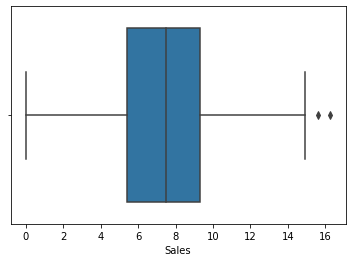

In [16]:
sns.boxplot(CompanyData['Sales'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompPrice'>

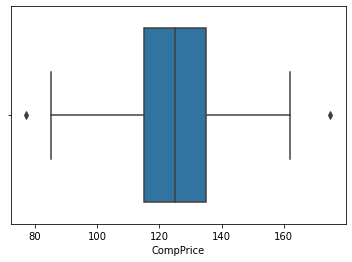

In [17]:
sns.boxplot(CompanyData['CompPrice'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

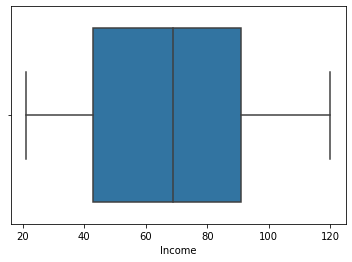

In [18]:
sns.boxplot(CompanyData['Income'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Advertising'>

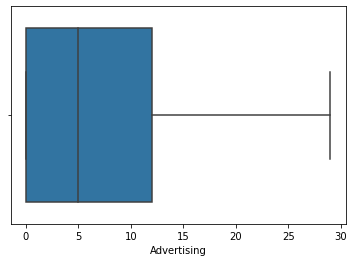

In [19]:
sns.boxplot(CompanyData['Advertising'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population'>

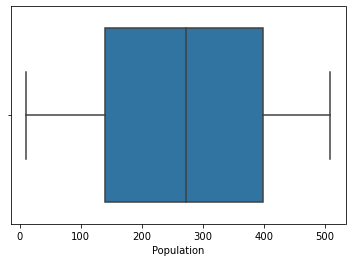

In [20]:
sns.boxplot(CompanyData['Population'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

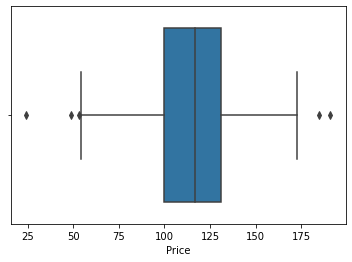

In [21]:
sns.boxplot(CompanyData['Price'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

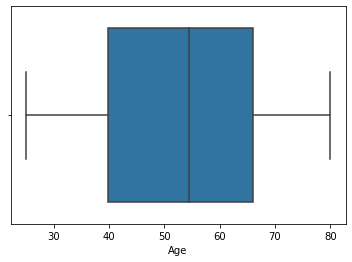

In [22]:
sns.boxplot(CompanyData['Age'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education'>

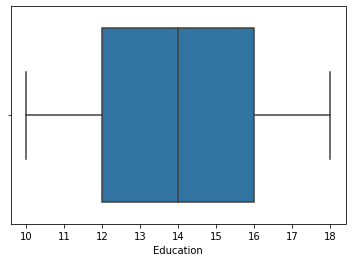

In [23]:
sns.boxplot(CompanyData['Education'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales'>

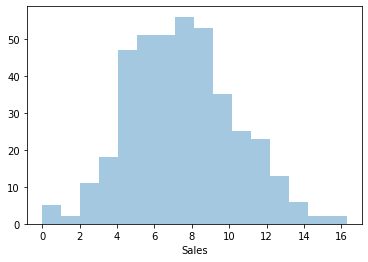

In [24]:
#As our target variable is sales so let's represent it in distplot visualization to know it's distribution properly
# DISTPLOT for the variable "Sales"
sns.distplot(CompanyData['Sales'] ,kde=False)

From the above we can see that the value falls in between 0 to 16000.
We'll distribute the ales variable into three Bins: 'Low', 'Medium', 'High'
As the value lies between 0 to 16, so we'll set o as the minimum and 16 as the maximum one.
0-5(low) = 1st Bin, 5-10(Medium) = 2nd Bin, 10-16(High) = 3rd Bin

In [25]:
CompanyData['Sales_cat'] = pd.cut(x=CompanyData['Sales'], bins=[0, 5.5, 11, 16.5], labels=['Low','Medium','High'], right=False)
CompanyData.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban_No  Urban_Yes  US_No  US_Yes Sales_cat  
0         17         0          1      0       1    Medium  
1         10         0          1      0       1      High  
2         12         0          1      0       1    Medium  
3         14         0          1      0       1    Medium  
4         13         0          1      1       0       Low

In [26]:
CompanyData['Sales_cat'].value_counts()

Medium    248
Low       103
High       49
Name: Sales_cat, dtype: int64

In [27]:
X = CompanyData.drop('Sales',axis=1,inplace=True)

In [28]:
X=CompanyData.drop('Sales_cat',axis=1) 

In [29]:
X

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban_No  Urban_Yes  US_No  US_Yes  
0           17         0          1      0       1  
1           10         0          1      0       1  
2           12         0          1      0       1  
3           14         0          1      0       1  
4           13         0          1      1       0  
..         ...       ...        ...    ...     ...  
395         14         0          1      0       1  
396         11         1          0      0       1  
397         18         0          1      0       1  
398         12         0          1      0       1  
399         16         0          1      0       1  

[400 rows x 12 columns]

In [30]:
Y = CompanyData['Sales_cat']
Y.isnull().sum()

0

In [31]:

CompanyData[CompanyData['Sales_cat'].isnull()].index.tolist()

[]

In [32]:
CompanyData.iloc[174:175,:]

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
174        139      24            0         358    185          2   79   

     Education  Urban_No  Urban_Yes  US_No  US_Yes Sales_cat  
174         15         1          0      1       0       Low

In [33]:
CompanyData.iloc[376:377,:]

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
376        141      60           19         319     92          1   44   

     Education  Urban_No  Urban_Yes  US_No  US_Yes Sales_cat  
376         11         0          1      0       1      High

In [34]:
#Train and test data:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=30)

In [35]:

X_train

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
313        103      81            3         491     54          2   66   
21         134      29           12         239    109          1   62   
222        136     119            6         178    145          2   35   
350        111     101           17         266     91          2   63   
398        100      79            7         284     95          0   50   
..         ...     ...          ...         ...    ...        ...  ...   
309        131     111           13          33     80          0   68   
386        152     116            0         170    160          2   39   
140        133      60           10         277    129          2   45   
301         99      93            0         198     87          2   57   
293        123      84            0          74     89          1   59   

     Education  Urban_No  Urban_Yes  US_No  US_Yes  
313         13         0          1      1       0  
21          18         1          0      0       1  
222         13         0          1      0       1  
350         17         1          0      0       1  
398         12         0          1      0       1  
..         ...       ...        ...    ...     ...  
309         18         0          1      0       1  
386         16         0          1      1       0  
140         18         0          1      0       1  
301         16         0          1      0       1  
293         10         0          1      1       0  

[320 rows x 12 columns]

In [36]:
X_train.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban_No       0
Urban_Yes      0
US_No          0
US_Yes         0
dtype: int64

In [37]:
Y_train.isnull().sum()

0

In [38]:
Y

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sales_cat, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

# DECISION TREE CLASSIFIER MODEL

In [39]:
# DT Classifier Model using Entropy
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
# Prediction on Train Data 
preds_train_dt = model.predict(X_train) 
pd.Series(preds_train_dt).value_counts()

Medium    245
Low        62
High       13
dtype: int64

In [41]:
# Prediction on Test Data
preds_dt = model.predict(X_test) 
pd.Series(preds_dt).value_counts()

Medium    63
Low       11
High       6
dtype: int64

In [42]:
# TRAIN ACCURACY
accuracy = accuracy_score(Y_train,preds_train_dt)
print(accuracy)

0.728125


In [43]:
# TEST Accuracy
accuracy = accuracy_score(Y_test,preds_dt)
print(accuracy)

0.7625


From the above accuracy calculation we concluded that there is not much difference between both.

In [44]:
print(classification_report(Y_test,preds_dt))

              precision    recall  f1-score   support

        High       0.50      0.50      0.50         6
         Low       0.73      0.44      0.55        18
      Medium       0.79      0.89      0.84        56

    accuracy                           0.76        80
   macro avg       0.67      0.61      0.63        80
weighted avg       0.76      0.76      0.75        80



[Text(657.6428571428571, 587.0880000000001, 'X[5] <= 0.5\nentropy = 1.339\nsamples = 320\nvalue = [43, 85, 192]'),
 Text(358.7142857142857, 456.624, 'X[4] <= 102.5\nentropy = 1.131\nsamples = 83\nvalue = [2, 45, 36]'),
 Text(191.31428571428572, 326.1600000000001, 'X[1] <= 76.5\nentropy = 1.006\nsamples = 29\nvalue = [2, 5, 22]'),
 Text(95.65714285714286, 195.69600000000003, 'X[6] <= 49.5\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(47.82857142857143, 65.23200000000008, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 7]'),
 Text(143.4857142857143, 65.23200000000008, 'entropy = 0.954\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(286.9714285714286, 195.69600000000003, 'X[0] <= 124.5\nentropy = 0.592\nsamples = 14\nvalue = [2, 0, 12]'),
 Text(239.14285714285714, 65.23200000000008, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]'),
 Text(334.8, 65.23200000000008, 'entropy = 0.971\nsamples = 5\nvalue = [2, 0, 3]'),
 Text(526.1142857142858, 326.1600000000001, 'X[6] <= 61.5\nentropy = 0.8

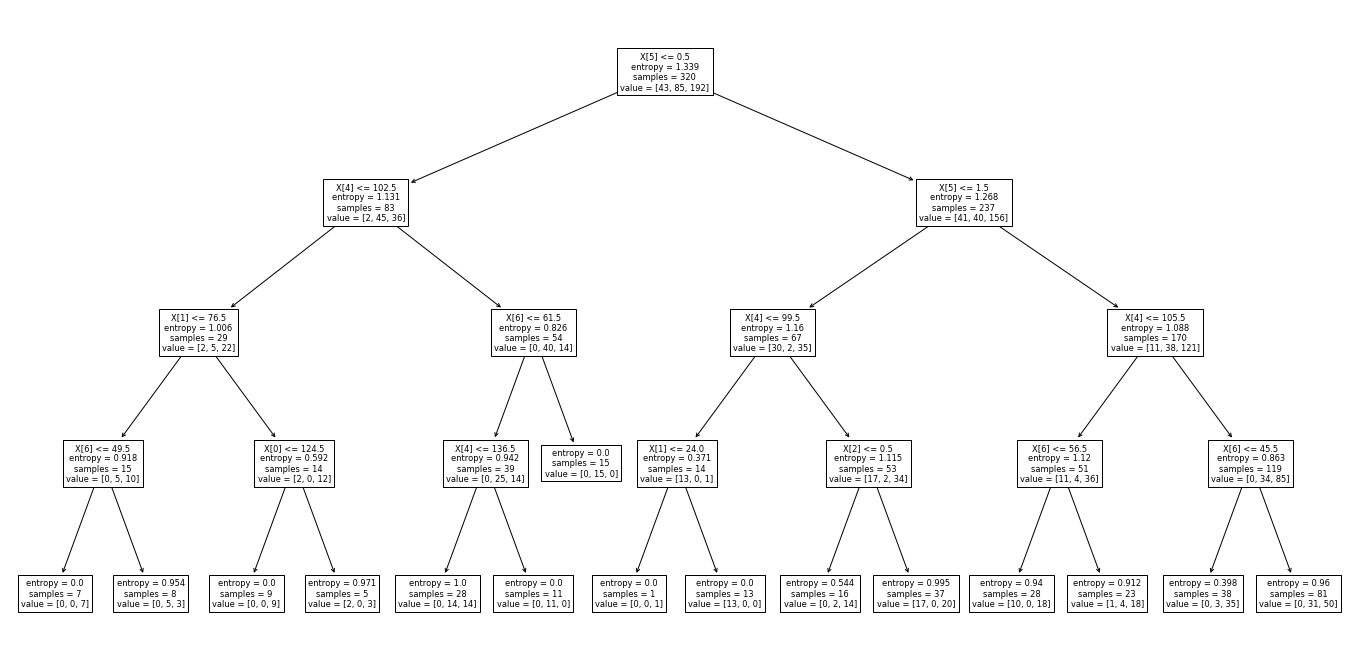

In [45]:
plt.figure(figsize=(24,12))
tree.plot_tree(model)

In [46]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['High', 'Low', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=800)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn, filled = True,fontsize =4)

[Text(3653.571428571429, 6523.2, 'ShelveLoc <= 0.5\nentropy = 1.339\nsamples = 320\nvalue = [43, 85, 192]\nclass = Medium'),
 Text(1992.857142857143, 5073.6, 'Price <= 102.5\nentropy = 1.131\nsamples = 83\nvalue = [2, 45, 36]\nclass = Low'),
 Text(1062.857142857143, 3624.0, 'Income <= 76.5\nentropy = 1.006\nsamples = 29\nvalue = [2, 5, 22]\nclass = Medium'),
 Text(531.4285714285714, 2174.4000000000005, 'Age <= 49.5\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]\nclass = Medium'),
 Text(265.7142857142857, 724.8000000000002, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 7]\nclass = Medium'),
 Text(797.1428571428571, 724.8000000000002, 'entropy = 0.954\nsamples = 8\nvalue = [0, 5, 3]\nclass = Low'),
 Text(1594.2857142857142, 2174.4000000000005, 'CompPrice <= 124.5\nentropy = 0.592\nsamples = 14\nvalue = [2, 0, 12]\nclass = Medium'),
 Text(1328.5714285714287, 724.8000000000002, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]\nclass = Medium'),
 Text(1860.0, 724.8000000000002, 'entropy = 0

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_new = RandomForestClassifier(n_estimators=250,max_depth=10,min_samples_split=20,criterion='entropy')  # n_estimators is the number of decision trees
forest_new.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=20,
                       n_estimators=250)

In [48]:
# predicting on train data set 
pred_rf_train = forest_new.predict(X_train) 
pd.Series(pred_rf_train).value_counts()

Medium    255
Low        55
High       10
dtype: int64

In [49]:
pred_rf_train.shape

(320,)

In [50]:
X_train.shape

(320, 12)

In [51]:
# predicting on test data set
pred_rf = forest_new.predict(X_test)  
pd.Series(pred_rf).value_counts()

Medium    73
Low        6
High       1
dtype: int64

In [52]:
# Test Accuracy

accuracy = accuracy_score(Y_test,pred_rf)
print(accuracy)

0.7875


In [53]:
# Train Accuracy

accuracy_train = accuracy_score(Y_train,pred_rf_train)
print(accuracy_train)

0.796875


There is not much difference between the accuracies, above. 

In [54]:
print(classification_report(Y_test,pred_rf))

              precision    recall  f1-score   support

        High       1.00      0.17      0.29         6
         Low       1.00      0.33      0.50        18
      Medium       0.77      1.00      0.87        56

    accuracy                           0.79        80
   macro avg       0.92      0.50      0.55        80
weighted avg       0.84      0.79      0.74        80



In [55]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['High', 'Low', 'Medium']

estimator = forest_new.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = fn,
                class_names = cn,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
fig.savefig('rf_5trees.png')



In [56]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'rf_5trees.png')